# Data preprocessing using ML model with python
> We will see here how ML approach can be applied to make prediction of the state of the water valve of our intelligent system 

![ML approach](piste_notebook/ml1.png)

# What will we use as a Model :
> A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning, which will be the main focus of this article.
> Decision trees, one of the simplest and yet most useful Machine Learning structures. Decision trees, as the name implies, are trees of decisions.

## Starting now with uploading our dataset and visualising it's features distribution :

In [3]:
#Importing the required modules to make a ML model 
import pandas as pd
import numpy as np
import seaborn as sns


#Loading the dataset 
df  = pd.read_csv("C:\\Users\\Dell\\Desktop\\WaterDataSet.csv")
df.head()

,id,lum,hum,temp,target
0,1,11000,54,13,0
1,2,7540,45,10,0
2,3,0,44,7,0
3,4,4,29,40,1
4,5,6788,33,43,1


In [4]:
df.columns

Index(['id', 'lum', 'hum', 'temp', 'target'], dtype='object')

In [5]:
X = df[['lum','hum','temp']]
Y = df[['target']]

In [6]:
X.head()

,lum,hum,temp
0,11000,54,13
1,7540,45,10
2,0,44,7
3,4,29,40
4,6788,33,43


In [7]:
Y.head()

,target
0,0
1,0
2,0
3,1
4,1


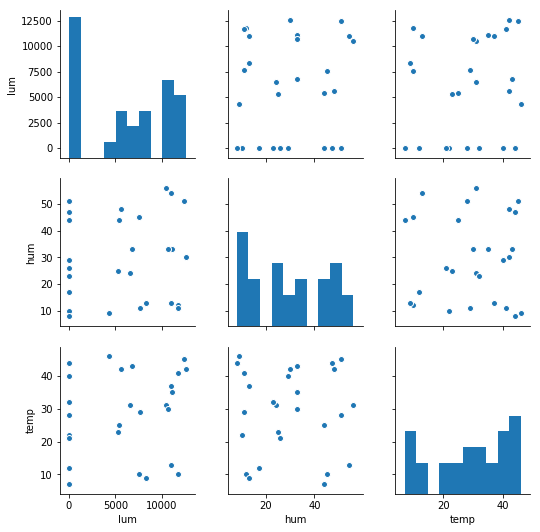

In [8]:
#Visualisation of the distribution of parameters of our dataset
sns.pairplot(X)

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


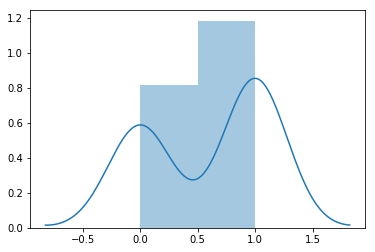

In [9]:
sns.distplot(Y)

In [10]:
X.corr()

,lum,hum,temp
lum,1.000000,0.084200,0.079205
hum,0.084200,1.000000,-0.019015
temp,0.079205,-0.019015,1.000000


## Here we'll split our dataset into training data and test data :

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Choosing the Decision Tree Model and fitting the model with training data :

In [12]:
#Loading a Decision Tree model and fitting it with the training dataset
from sklearn.tree import DecisionTreeClassifier
lm = DecisionTreeClassifier(random_state=0)
lm.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [13]:
#making prediction on the test dataset 
predictions = lm.predict(X_test)
y_test
predictions

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [14]:
y_test

,target
25,1
22,1
24,0
20,0
10,0
19,0
2,0
7,1
3,1
1,0


In [15]:
#Lets check with accuracy score of the model
from sklearn.metrics import accuracy_score
print("Accuracy score is ", accuracy_score(y_test,predictions))

Accuracy score is  0.9090909090909091


## Trying simple example :

In [16]:
#Here's a simple test
tt=pd.DataFrame([5000,45,90])
tt=tt.transpose()
a=lm.predict(tt)
print(a[0])

0


## Let's begin interaction with Database :
> Here we use parameters of our database stored in AWS instance to  access 
> The script will each periode of time read data from the table containing mesures 
> Then the model will be applied on those data
> In the end the script will store the mesured data and the decision in a new table which will be used to visualise data in the web interface of our project.

![____](piste_notebook/ml2.png)

In [17]:
#Importing the required modules to interact with mesurements in Database
import mysql.connector
import time

In [19]:
#defining parameters of our database
USERNAME ="piste10"
PASSWORD = "piste10"
DBNAME = "PISTE10"
HOSTNAME = "ec2-108-128-15-84.eu-west-1.compute.amazonaws.com"  

In [22]:
#retrieving data, making prediction on it's mesurements and then storing the result in a table
while (1): 
    con =mysql.connector.connect(host = HOSTNAME ,user= USERNAME,passwd = PASSWORD ,db =  DBNAME, port = 3306)
    con.autocommit = True
    cursor = con.cursor()
    print ("Connected to your Database!")

    cursor.execute("SELECT COUNT(*) FROM Agro_Environmental_Parameters1")
    rowscount = cursor.fetchall()
    rowscount=rowscount[0][0]
    print(rowscount)
    count=1
    while (count <= rowscount):
        cursor.execute("""SELECT * from Agro_Environmental_Parameters1 where Row_ID = %s""", (count, ))
        data=cursor.fetchall()
        lum=data[0][2]
        hum=data[0][3]
        temp=data[0][4]
        tt=pd.DataFrame([lum,hum,temp])
        tt=tt.transpose()
        res=lm.predict(tt)
        print(res[0])
        cursor.execute("INSERT INTO  resultat_Python() VALUES(%s,%s,%s,%s,%s,%s,%s,%s)" ,(data[0][0],data[0][1],data[0][2],data[0][3],data[0][4],data[0][5],data[0][6],int(res[0])))
        time.sleep(5)
        count=count+1

cursor.close()
con.close()

Connected to your Database!
18266
0
0
0
0
0
0
0
0
0
0


IndexError: list index out of range

## Sensor's measurements :

![Sensor's measurements](piste_notebook/ml3.png)

## Results using machine learning aproach : 

![title](piste_notebook/ml4.png)

In [24]:
#______________________________________________Fin________________________________________________